# Intro into Image classification using Keras

Keras is a minimalisitc Python Deep Learning library  that works on top of TensorFlow or Theano. Keras helps in fast prototyping of Deep learning models. It works seamlesly with CPUs and GPUs, you don't need to worry about scoping your variables for CPU and GPU. 

Documentation for keras is available in https://keras.io/

Keras community is very active, there are couple of ways to reach out if you have questions 
slack channel "keras.io"
gitter channel "keras"


# MNIST Dataset

We are going to use MNIST dataset (digits from 0-9) for this demo. Dataset was constructed from scanned documents. Couple of reasons for using this dataset 
1) Images are normalized in size and centered. Not much pre-processing is required.
2) Dataset is small enough to be trained on CPU rather than using GPU.
3) This Dataset is the "Hello World" for Image processing. 
 

Citations 
For this tutorial i am referring to content from 
1) Andrej Karpathy's Standford Computer Vison Course http://cs231n.github.io/
2) Adam Getigey's blog on Machine Learning is fun https://medium.com/@ageitgey/
3) Keras repository of examples https://github.com/fchollet/keras/blob/master/examples/

In [1]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
import keras
import matplotlib as plt
from keras.datasets import mnist
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

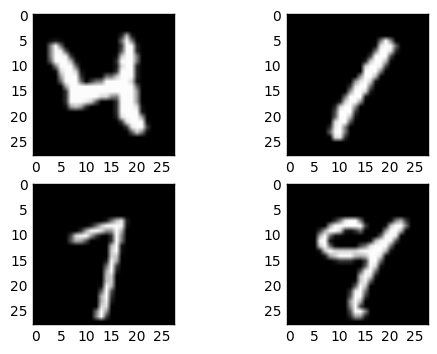

In [11]:
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[20], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[23], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[42], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[54], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [10]:
# Lets take a look at shape of Images
print(X_train.shape)


(60000, 28, 28)
(60000,)


In [9]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

# # Fully connected Model

Lets build a full connected model for a bench mark.

In [13]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

To all the ones in relationship or married, use this to remember anniversary date. it is very important :). I specifically use this to remember my marriage date so i will never run into an issue of forgetting it.

Jokes apart, set the seed value if you want to reproduce the exact same result.


In [14]:
seed = 10212010
numpy.random.seed(seed)

In [15]:
print(X_train.shape)


(60000, 28, 28)


In [17]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]


In [18]:
#Flatten it to be fed as input into Dense Layer
X_train_flatten = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test_flatten = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [19]:
# normalize inputs from 0-255 to 0-1. This is for optimizer to converge faster. 
X_train_flatten = X_train_flatten / 255
X_test_flatten = X_test_flatten / 255

In [20]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


In [21]:
fullyconnected_model = Sequential()


Dense Layer takes few parameters as input. I will try to give an explanation for the parameters used here

output_dim : Output dimension of Dense Layer. In our case i am using 512, you can look at it as number of neurons in a layer. 
init: name of initialization function for the weights of the layer.
activation: name of activation function to use few options are relu, tanh, sigmoid, linear, softmax . Refer to https://keras.io/activations/ for more details
input_dim : shape of input array. In our case it will be 784


In [27]:
#Dense Layer 1
fullyconnected_model.add(Dense(512, input_dim=num_pixels, init='normal', activation='relu', name='main_input'))


Dense Layer 2 is output Layer. Hence Softmax is used as activation function. 

In [28]:
#Dense Layer 2
fullyconnected_model.add(Dense(num_classes, init='normal', activation='softmax'))


Keras model has to be compiled. Compile function takes below parameters as input 
Loss function : It takes metrics as input, there are few metrics available in keras like mean_squared_error, mean_absolute_precentage_error, hinge, categorical cross entropy. Refer to https://keras.io/metrics/ for more details. We are going to use categorical cross entropy since this is a multi-class classification problem. 

There are few optimizers are available as part of Keras, we are using Adam here for this example.




In [29]:
# Compile model
fullyconnected_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Keras uses scikit-learn style methods to do training and inference.  
Fit function takes following parameters as input Training dataset, training labels, validation_data should be a tuple with validation data and labels, number of epochs, batchsize (Number of samples per gradient update) and verbose (0 for no logging to stdout, 1 for progress bar logging, 2 for one log line per epoch) .


In [30]:
fullyconnected_model.fit(X_train_flatten, y_train, validation_data=(X_test_flatten, y_test), nb_epoch=10, batch_size=200, verbose=2)


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
8s - loss: 0.3723 - acc: 0.9824 - val_loss: 0.1039 - val_acc: 0.9783
Epoch 2/10
8s - loss: 0.0295 - acc: 0.9934 - val_loss: 0.1011 - val_acc: 0.9787
Epoch 3/10
8s - loss: 0.0219 - acc: 0.9950 - val_loss: 0.1157 - val_acc: 0.9772
Epoch 4/10
8s - loss: 0.0223 - acc: 0.9946 - val_loss: 0.1137 - val_acc: 0.9784
Epoch 5/10
8s - loss: 0.0170 - acc: 0.9959 - val_loss: 0.0966 - val_acc: 0.9813
Epoch 6/10
8s - loss: 0.0224 - acc: 0.9945 - val_loss: 0.1073 - val_acc: 0.9797
Epoch 7/10
8s - loss: 0.0117 - acc: 0.9971 - val_loss: 0.0973 - val_acc: 0.9817
Epoch 8/10
8s - loss: 0.0128 - acc: 0.9969 - val_loss: 0.1176 - val_acc: 0.9788
Epoch 9/10
8s - loss: 0.0108 - acc: 0.9973 - val_loss: 0.1119 - val_acc: 0.9792
Epoch 10/10
9s - loss: 0.0122 - acc: 0.9969 - val_loss: 0.1066 - val_acc: 0.9795


# Convolutional Neural Networks

Most of the innovations that happened in computer vision in the past few years is due to using CNN for Image Processing. 


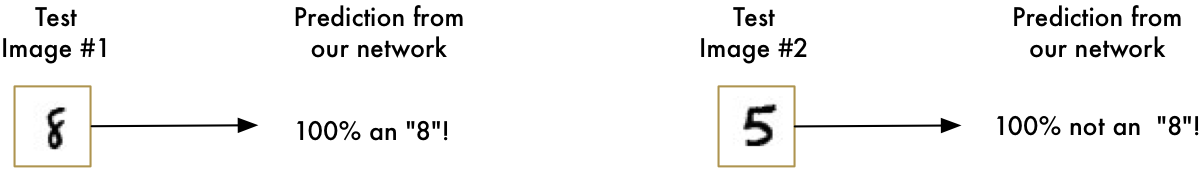

In [60]:
#Image from Adam Geitgey's blog
from IPython.display import Image
Image(filename='FeedForward Image.png')


Flattening and feeding Images to Neural Network actually worked for the above image, then why do we need another type of Neural Network.


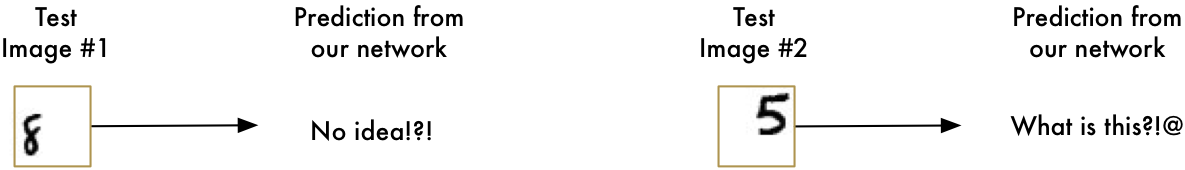

In [61]:
#Image from Adam Geitgey's blog
from IPython.display import Image
Image(filename='Image_Different_places.png')


### Translation Invariance

Neural Network thinks that "8" in a different part of Image is totally different thing. It doesn't understand that moving an object in an picture doesn't make it different. We need to give a neural network Translation Invariance. 

Convolution is the way to give Translation Invariance. It can be achieved in 4 steps

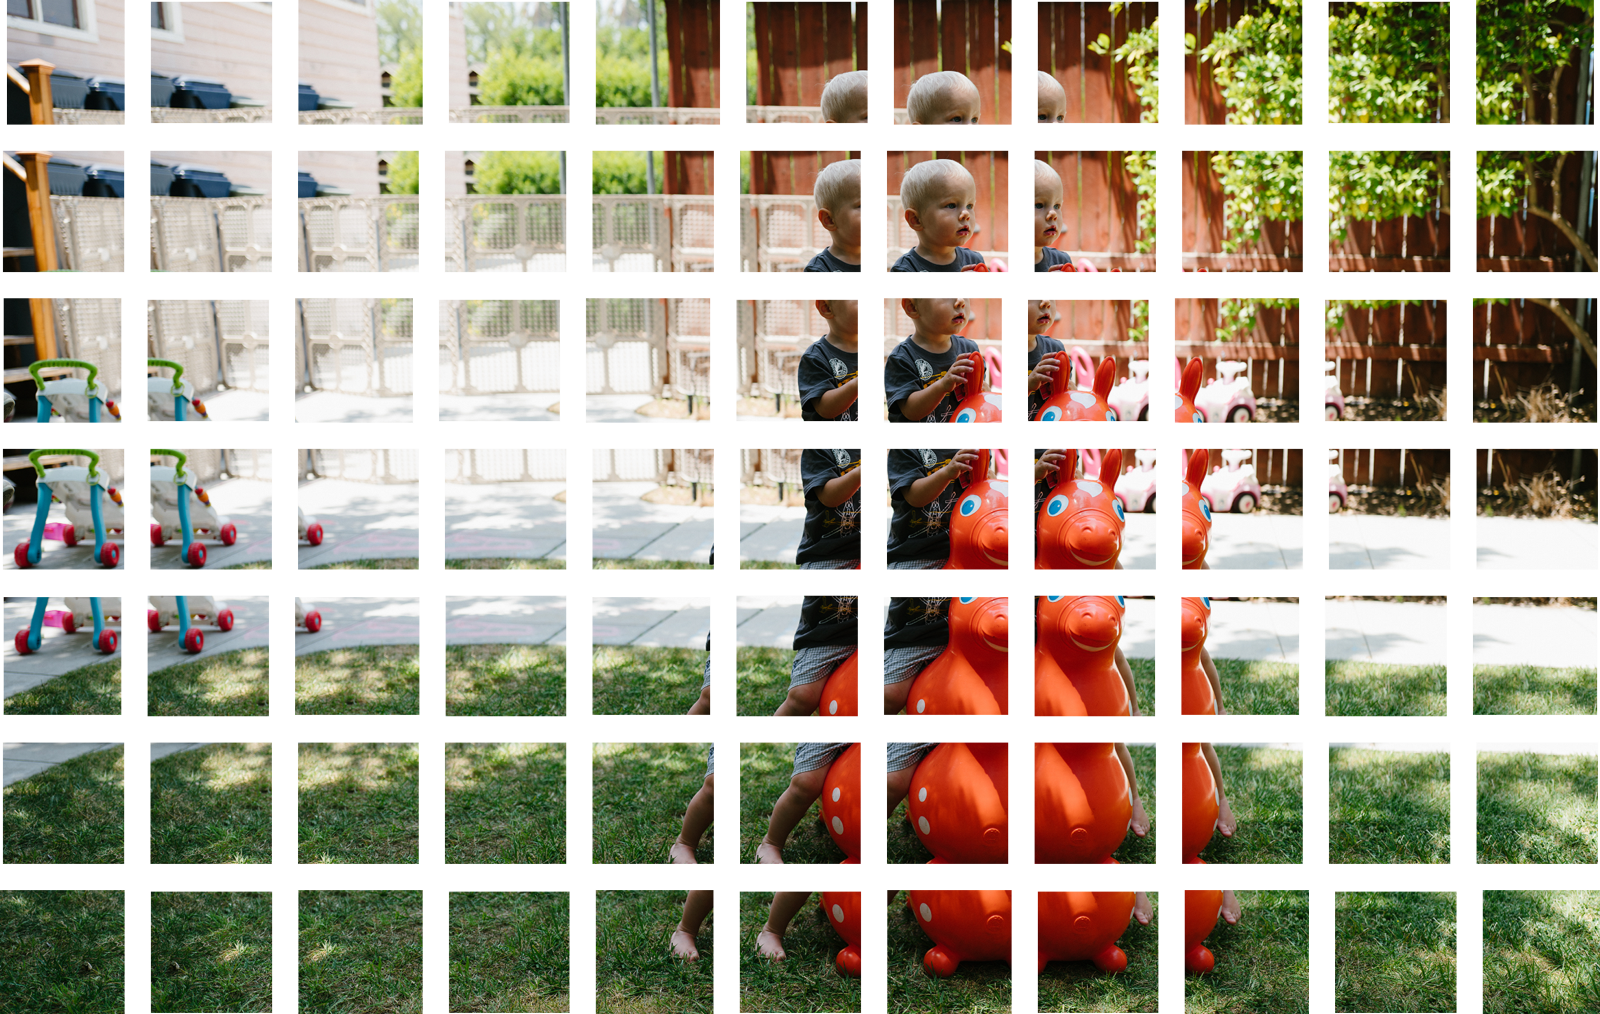

In [62]:
#Step1 Break Image into overlapping Image tiles and pass sliding window on the entire Image
# Save each result as a separate, tiny picture tile

#Image from Adam Geitgey's blog
from IPython.display import Image
Image(filename='tiled_image.png')


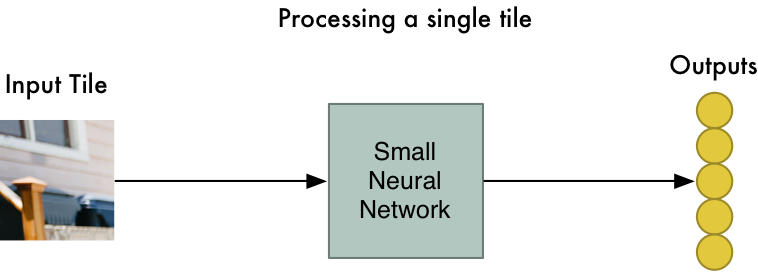

In [63]:
#Step2 Feed each image tile into a small neural network. In Feed Forward Neural Network
# Entire Image was fed into one neural network. In this approach we will do it for every image tile
# Weights/Gradients will be shared for every single tile in the Image.
#Image from Adam Geitgey's blog
from IPython.display import Image
Image(filename='single_tile_image.png')

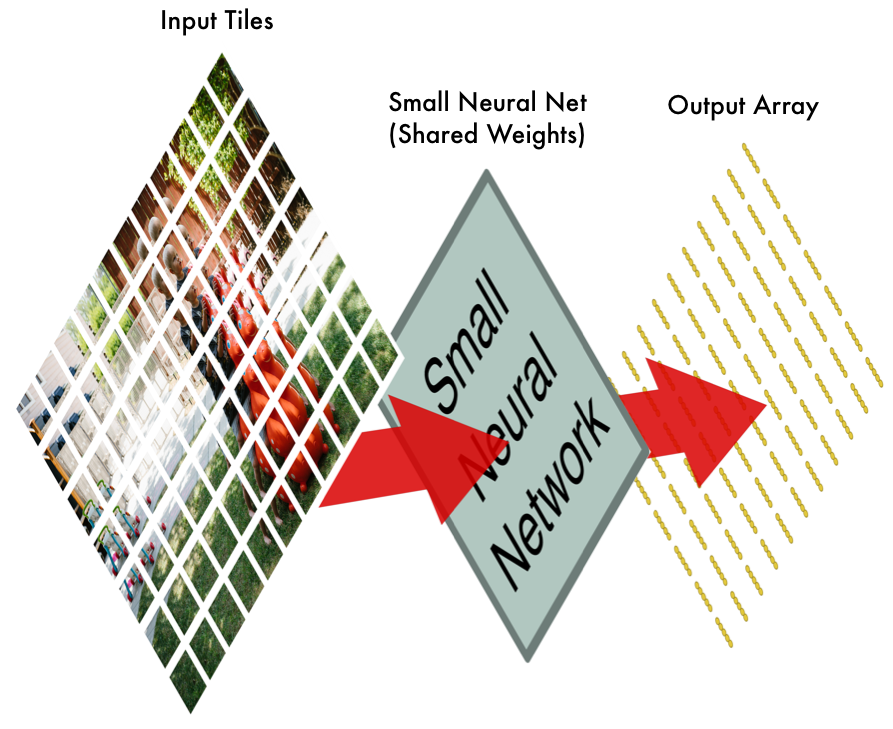

In [64]:
#Step3 Save Results from each tile into a new Array
#We don't want to lose track of the arrangement of the original tiles. So we save result from 
#processing tile into same grid arrangement
#Image from Adam Geitgey's blog
from IPython.display import Image
Image(filename='output_array.png')

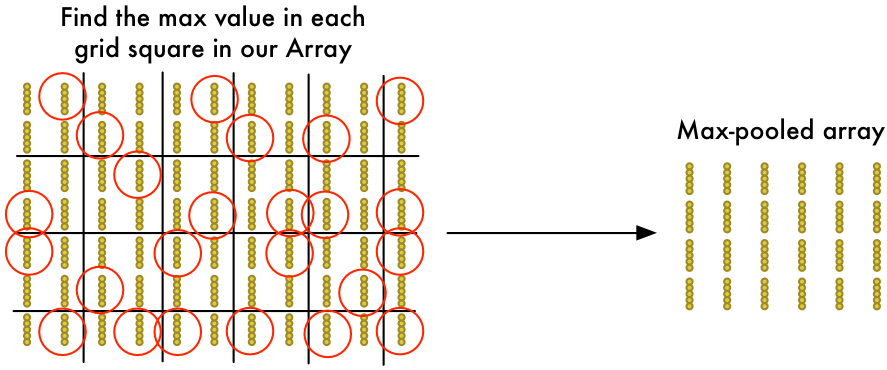

In [65]:
#step4 Reduce the Size of output array by doing downsampling
#Maxpooling is used for downsampling. 
#You look at a 2x2 square of the array and keep the biggest number
#Image from Adam Geitgey's blog
from IPython.display import Image
Image(filename='max_pooling.png')

In [35]:
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K


Image ordering is different between tensorflow and theano 
Theano uses nb_sample, channels, height, width.
Tensorflow uses nb_sample, height, width, channels
If your model doesn't converge then check on image_dim_ordering. 

In [36]:
K.set_image_dim_ordering('tf')

Since images are gray scale and conv2D operation needs a 4D Tensor as input (samples, rows, cols, channel) we need to reshape input data into 

In [47]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols , 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols , 1).astype('float32')

In [48]:
X_train.shape

(60000, 28, 28, 1)

In [49]:
X_test.shape

(10000, 28, 28, 1)

In [51]:
batch_size = 200
nb_classes = 10
nb_epoch = 10

# input image dimensions
img_rows, img_cols = 28, 28
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (3, 3)

In [50]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


Convolution operator for filtering windows of two-dimensional inputs. 


In [52]:
cnn_model = Sequential()
cnn_model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1], border_mode='valid', input_shape=(img_rows, img_cols, 1)))
cnn_model.add(Activation('relu'))
cnn_model.add(MaxPooling2D(pool_size=pool_size))
cnn_model.add(Dropout(0.2))
cnn_model.add(Flatten())
cnn_model.add(Dense(128))
cnn_model.add(Activation('relu'))
cnn_model.add(Dense(num_classes))
cnn_model.add(Activation('softmax'))


In [53]:
cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [57]:
cnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=1, batch_size=batch_size, verbose=2)


Train on 60000 samples, validate on 10000 samples
Epoch 1/1
77s - loss: 0.0232 - acc: 0.9923 - val_loss: 0.0340 - val_acc: 0.9885


In [56]:
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

SVG(model_to_dot(cnn_model).create(prog='dot', format='svg'))

AttributeError: 'module' object has no attribute 'find_graphviz'